## 1 引言

上一篇博客中介绍了ID3和C4.5两种决策树算法，这两种决策树都只能用于分类问题，而本文要说的CART（classification and regression tree）决策树不仅能用于分类问题，也能用于回归问题。

与ID3算法和C4.5算法相比，CART 还有个特性就是其所有非叶子结点都只有两个子树，也就是说在根据特征属性分裂数据集时，无论该特征属性有多少个可能取值，都只有两种选择——‘是’和‘否’，以上文中判断是否是程序员数据集为例，如果根据近视程度进行分裂，可以将数据集分为{‘轻微’}和{‘中等’，‘严重’}两个数据集（当然也可以是其两种组合）然后在进一步迭代中进一步细化分数据集。

下面，我们分别说说CART算法如何解决分类问题和回归问题。

## 2 分类问题

对于分类问题，CART算法采用基尼指数作为最优分裂特征属性选择标准。

先来说说基尼指数，与熵一样，基尼指数越小则数据集不确定性越小，代表着数据集纯度越高。给定数据集$X$包含$L$个分类，那么数据集$X$的基尼指数为：

$$Gini(X) = \sum\limits_l^L {\frac{{|{X_l}|}}{{|X|}}(1 - \frac{{|{X_l}|}}{{|X|}})}  = 1 - {\sum\limits_{l = 1}^L {\left( {\frac{{|{X_l}|}}{{|X|}}} \right)} ^2}$$

假设$A$是数据集$X$中包含若干个可能取值的一个特征属性，$a$是$A$的其中一个可能取值，将数据集$X$按照$a$进行划分，就可以分为两个数据集，分别是${X_1} = \left\{ {x \in X|{x_A} = a} \right\}$和${X_2} = \left\{ {x \in X|{x_A} \ne a} \right\}$，那么在特征$A$下，集合$X$的基尼指数为：

$$Gini(X,A) = \left| {\frac{{{X_1}}}{X}} \right|Gini({X_1}) + \left| {\frac{{{X_2}}}{X}} \right|Gini({X_2})$$

接下来，我们通过实例演示如果应用基尼指数选择最优分裂特征属性。还是使用上篇博客中介绍ID3算法时使用过的数据集，如下所示。先来计算三个特征属性各个可能取值的基尼指数。

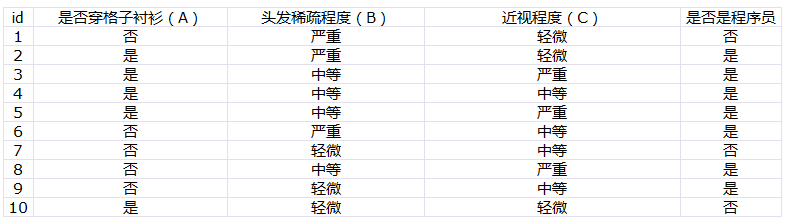

对属性$A$的“穿格子衬衫”这个值计算基尼指数：

$$Gini(X,{A_1}) = \frac{5}{{10}} \times \left\{ {2 \times \frac{4}{5} \times \frac{1}{5}} \right\} + \frac{5}{{10}} \times \left\{ {2 \times \frac{3}{5} \times \frac{2}{5}} \right\} = 0.4$$

对属性$A$的“不穿格子衬衫”这个值计算基尼指数，由于只有两个属性，无论按照哪个属性来计算结果都一样，所以：

$$Gini(X,{A_2}){\text{ = }}Gini(X,{A_1}) = 0.4$$

对属性$B$的“严重”这个值计算基尼指数：

$$Gini(X,{B_1}) = \frac{3}{{10}} \times \left\{ {2 \times \frac{2}{3} \times \frac{1}{3}} \right\} + \frac{7}{{10}} \times \left\{ {2 \times \frac{5}{7} \times \frac{2}{7}} \right\} = 0.42$$

对属性$B$的“中等”这个值计算基尼指数：

$$Gini(X,{B_2}) = \frac{4}{{10}} \times \left\{ {2 \times \frac{4}{4} \times \frac{0}{4}} \right\} + \frac{6}{{10}} \times \left\{ {2 \times \frac{3}{6} \times \frac{3}{6}} \right\} = 0.3$$

对属性$B$的“轻微”这个值计算基尼指数：

$$Gini(X,{B_3}) = \frac{3}{{10}} \times \left\{ {2 \times \frac{1}{3} \times \frac{2}{3}} \right\} + \frac{7}{{10}} \times \left\{ {2 \times \frac{6}{7} \times \frac{1}{7}} \right\} = 0.46$$

对属性$C$的“严重”这个值计算基尼指数：

$$Gini(X,{C_1}) = \frac{3}{{10}} \times \left\{ {2 \times \frac{0}{3} \times \frac{3}{3}} \right\} + \frac{7}{{10}} \times \left\{ {2 \times \frac{4}{7} \times \frac{3}{7}} \right\} = 0.34$$

对属性$C$的“中等”这个值计算基尼指数：

$$Gini(X,{C_2}) = \frac{3}{{10}} \times \left\{ {2 \times \frac{1}{3} \times \frac{2}{3}} \right\} + \frac{7}{{10}} \times \left\{ {2 \times \frac{5}{7} \times \frac{2}{7}} \right\} = 0.42$$

对属性$C$的“轻微”这个值计算基尼指数：

$$Gini(X,{C_3}) = \frac{3}{{10}} \times \left\{ {2 \times \frac{1}{3} \times \frac{2}{3}} \right\} + \frac{7}{{10}} \times \left\{ {2 \times \frac{6}{7} \times \frac{1}{7}} \right\} = 0.46$$

可见，属性$B$的“中等“取值时具有最小的基尼指数，所以这个值作为当前数据集的最优分裂特征属性值。分裂后，可以获得两个数据集，对获得的数据集继续计算基尼指数，选择最优分裂特征属性值，如此迭代形成一颗完整的决策树。

对于连续型特征属性，可以参照C4.5算法对连续型特征属性的处理方法，只不过在CART算法中是计算基尼指数。

## 3 回归问题

此时，我们研究的已经是回归问题了（关于回归与分类，在讨论线性回归算法的时候已经分析过，如果还不清楚，[传送门](https://www.cnblogs.com/chenhuabin/p/11222702.html#_label1)走起），所以，请转变思路，对于任意一个$x \in X$，经过决策树后的输出$f(x)$的可能取值已经不再像之前的分类决策树那样，$f(x)$的取值只可能是在$X$中出现过的那几种取值，回归树最后的输出$f(x)$可能是之前没有出现过的，甚至连可能值的个数都不固定。所以，对于回归树，首先解决的问题就是如何确定$f(x)$的可能值。

对于数据集$X$，假设我们在其特征属性$A$上早上一个值$a$将数据集划分成两类：

$${X_1} = \{ x|{x_A} \leqslant a\} $$

$${X_2} = \{ x|{x_A} > a\} $$

在这两个类上的输出值$f(x)$分别为${c_1}$和${c_2}$，那么根据特征属性$A$的值$a$对$X$进行划分，所产生的总误差是：

$$Los{s_{A,a}} = \sum\limits_{x \in {X_1}} {(y - {c_1}} {)^2} + \sum\limits_{x \in {X_2}} {(y - {c_2}} {)^2}$$

式中，$y$是$x$对应的真实值。我们的目标就是使得$Los{s_{A,a}}$最小化时的${c_1}$和${c_2}$，目标函数为：

$${\min \sum\limits_{x \in {X_1}} {{{(y - {c_1})}^2}}  + \min \sum\limits_{x \in {X_2}} {{{(y - {c_2})}^2}} }$$

那么，当${c_1}$和${c_2}$取什么值的的时候$Los{s_{A,a}}$最小呢？根据最小二乘的性质可知，当${c_1}$和${c_2}$分为为${X_1}$和${X_2}$中所有$y$的平均值的时候${c_1}$和${c_2}$去的最小值，即：

$${c_i} = ave(y|x \in {X_i})$$

所以，如果根据$a$划分之后得到的是叶子结点，那么最终输出的值就是所属样本子集所有$y$的平均值。
$$f(x)={c_i} = ave(y|x \in {X_i})$$

对数如何确定输出值的问题，就已经解决了。接下来还剩两个个问题需要解决，那就是选择哪个属性作为最优分割特征属性以及选择哪个值作为最佳的分割点。

对于这个问题，可以通过遍历数据集各特征属性的可能取值的方式来解决：对数据集$X$中各特征属性$A$，计算其所有取值$a$下的$Los{s_{A,a}}$，然后对比所有$Los{s_{A,a}}$，取值最小的$Los{s_{A,a}}$所对应的特征属性$A$为当前最优分裂特征属性，$a$为最佳分裂点。

至此，如何确定各分支的输出值、如何选择最优分割特征属性和分割点的问题都已解决，最后总结一下CART算法在回归问题中的决策树构建流程：

（1）对当前数据集$X$，计算所有特征属性$A$下所有取值$a$作为分割点时的最小$Los{s_{A,a}}$；

（2）对比所有$Los{s_{A,a}}$，选择最小的$Los{s_{A,a}}$所对应的特征属性$A$为当前最优分裂特征属性，$a$为最佳分裂点将数据集划分都左右两个子树中；

（3）对左右两个子树的数据集重复（1）、（2）步骤继续划分，直到节点中数据集满足指定条件则决策树构建完成。

## 3 树剪枝

无论是面对分类问题，还是回归问题，最终生成的树都有可能过于复杂，容易发生过拟合的情况，所以决策树构建完成后，有必要进一步完成数剪枝。

本文代价复杂度剪枝 Cost-Complexity Pruning(CCP) 方法，过程如下：

输入：CART算法生成的决策树$T_0$  
输出：剪枝后的最优决策树${T_\alpha }$  
（1）令$k=0$， $T=T_0$，$\alpha  =  + \infty $；   
（2）自上而下地对各内部节点计算$C({T_t})$，$|{T_t}|$以及  

$$g(t) = {{C(t) - C({T_t})} \over {|{T_t}| - 1}}$$

$$\alpha  = \min (\alpha ,g(t))$$  

其中，$T_t$表示以$t$为根节点的子树，${C(t)}$是对$t$进行剪枝后对训练数据集的预测误差，${C({T_t})}$是对训练数据集的预测误差，${|{T_t}|}$是$T_t$的叶子结点个数；  
（3）自上而下地访问内部节点$t$，如果有$g(t)=\alpha$，则对$t$进行剪枝，并对叶子结点$t$以多数表决法决定输出，得到树$T$；  
（4）令$k=k+1$，${\alpha _k} = \alpha $，${T_k} = T$；  
（5）如果$T$不是由根节点单独构成的树，则回到步骤（3）；  
（6）采用交叉验证法在子树序列${T_0},{T_1}, \cdots ,{T_k} = T$选取最优的子树${T_\alpha }$。

要理解CART决策树的整个剪枝过程，关键是明白$g(t)$的含义，对于一颗理想的决策树，我们当然希望预测误差越小越好，树的规模也越小越好，但是两者却不能两全，因为往往预测误差随着树规模的增大而减小，所以单独考虑预测误差变化或者树规模变化都不合适，最好是选择一个衡量标准能够同时考虑到预测误差变化量和树规模变化，例如两者的比值。  

仔细$g(t)$的计算发现，分子是剪枝前后预测误差相减，也就是预测误差变化量，分子是剪枝前后叶子结点数的变化量，所以我们可以认为两者的比值就是树$t$每个叶子节点所带来的的预测误差的变化量，或者说树$t$所带来的的预测误差变化率——这就是$g(t)$的含义。 
为什么每次对$g(t)$最小的节点进行剪枝呢？因为$g(t)$越小代表对$t$对整个决策树的作用越小，对其进行剪枝对决策树的准确率影响也是最想的，当然应该优先被剪枝。

如果还不明白，那么通过下面的例子来理解吧。  
（例子来源于：https://www.jianshu.com/p/b90a9ce05b28）

有下面这个坐标中中的数据集，以及根据数据集构建好的决策树，如下图所示：

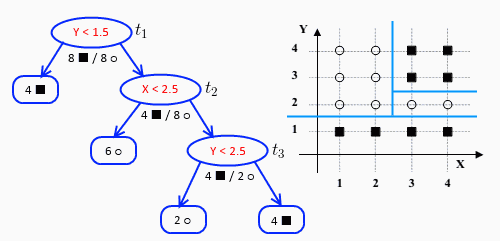

此时，${\alpha _1} = 0$，树中共有3个节点，对每个节点分别计算其$g(t)$：

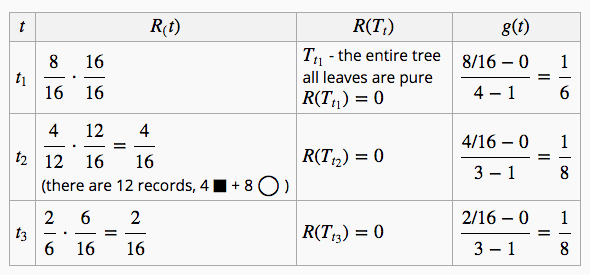

$t_1$、$t_2$节点的$g(t)$最小，我们选择剪枝少的节点，也就是$t_3$进行剪枝,并且令${\alpha _2} = {1 \over 8}$。剪枝后决策树如下：

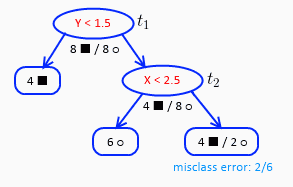

剩下两个节点，继续计算每一个节点的$g(t)$:

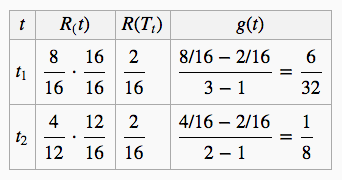

显然，$t_2$的$g(t)$更小，所以对$t_2$进行剪枝，并令${\alpha _3} = {1 \over 8}$：

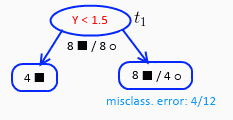

这时候仅剩下一个$t_1$，计算后有$g({t_3}) = {1 \over 4}$，所以${\alpha _4} = {1 \over 4}$

完成上述所有计算后，我们得到序列${\alpha _0} = 0,{\alpha _2} = {1 \over 8},{\alpha _3} = {1 \over 8},{\alpha _4} = {1 \over 4}$，以及对应的子树。接下来剩余的工作就是利用独立的验证数据集计算每个子树的平方误差或者基尼指数，选择误差最小的那个子树作为最优的剪枝后的树。

## 4 总结

在本文末尾对3种决策树算法做一个简单对比总结：

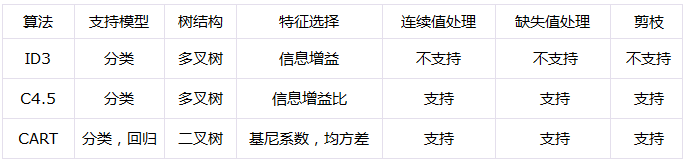